## Ising 1D

Usiamo Metropolis per studiare una catena di ising a 50 gradi di libertà con PBC. 
Abbiamo una scala di $100$ Temperature nell'intervallo $[0.5, 2]$.
La distribuzione di probabilità viene campionata tramite campionamento Metropolis e Gibbs. 
Ad ogni temperatura partiamo dalla configurazione precedente, esattamente come avverrebbe in un processo di raffreddamento.
$$
N = 2\times10^5  \text{step MC}\hspace{0.5 cm}
\left\{
	\begin{array}{ll}
	N_{blocks} = 20	\\
    N_{step} = 10^4
	\end{array}
\right.
$$


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


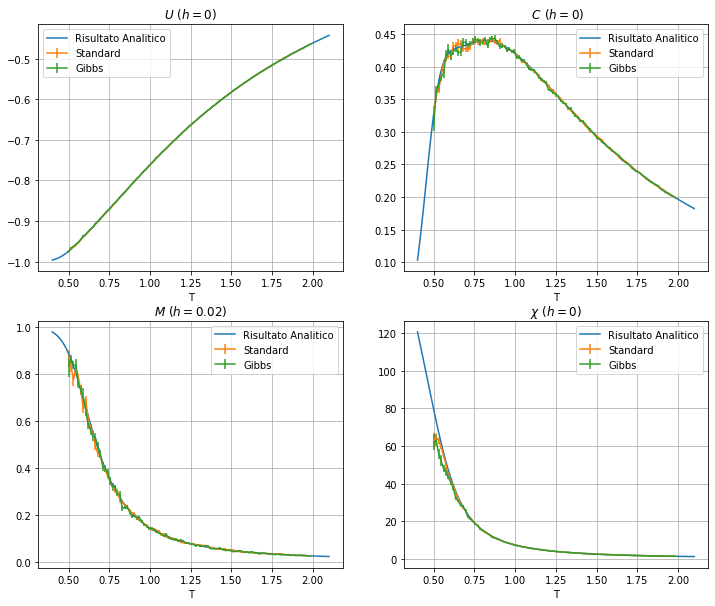

In [5]:
# Analitiche 
points=100
T = np.linspace(0.4,2.1,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

#E e C
e = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

#M e chi
h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
v = [e, heat, M, X]
f = plt.figure(figsize = (12, 10))


#metropolis standard
ti = np.loadtxt("results/mt_E.dat", usecols= (0))
mt_ave = [ np.loadtxt("results/mt_E.dat", usecols= (2)), np.loadtxt("results/mt_c.dat", usecols= (2)), np.loadtxt("results/mt_m.dat", usecols= (2)), np.loadtxt("results/mt_chi.dat", usecols= (2))]
mt_err = [ np.loadtxt("results/mt_E.dat", usecols= (3)), np.loadtxt("results/mt_c.dat", usecols= (3)), np.loadtxt("results/mt_m.dat", usecols= (3)), np.loadtxt("results/mt_chi.dat", usecols= (3))]
#gibbs
g_ave = [ np.loadtxt("results/g_E.dat", usecols= (2)), np.loadtxt("results/g_c.dat", usecols= (2)),
          np.loadtxt("results/g_m.dat", usecols= (2)), np.loadtxt("results/g_chi.dat", usecols= (2))]
g_err = [ np.loadtxt("results/g_E.dat", usecols= (3)), np.loadtxt("results/g_c.dat", usecols= (3)),
          np.loadtxt("results/g_m.dat", usecols= (3)), np.loadtxt("results/g_chi.dat", usecols= (3))]
attributes = ['$U$ ($h = 0$)', ' $C$ ($h = 0$)','$M$ ($h = 0.02$)', '$\chi$ ($h = 0$)']


for i in range(4):
    g = f.add_subplot(2, 2, i+1)
    g.plot(T, v[i], label = 'Risultato Analitico')
    g.errorbar(ti, mt_ave[i], mt_err[i], label = 'Standard')
    g.errorbar(ti, g_ave[i], g_err[i], label = 'Gibbs')
    plt.title(attributes[i])
    plt.xlabel('T')
    plt.legend()
    plt.grid(True)


